# Snapchat

## Install some libraries

```
pip install python-dotenv dnsdumpster openpyxl builtwith
```

In [1]:
# import statements

import requests
import os

In [2]:
# domain variables

http_protocol   = 'http://'
https_protocol  = 'https://'
domain          = 'snapchat.com'
headers         = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9"
}

In [3]:
# file variables

file_name = 'snapchat.com.xlsx'

## Setting up your API Keys

### Get API key from .env file

- Create .env file 
- Set variable name to:
`API_KEY=yourapikey`
- Create a `.gitignore` in the same directory as the .env to make sure this file doesn't get committed to GitHub
- Put the following in the `.gitignore`
`.env`

_Tip: files that start with `.` are "hidden" files but can still be used if you configure the right settings or options. For example, on the command line in bash you can use the following command: `ls -la` to list all files and directories_

The code to load up an environment variable is as follows:

- Install the `python-dotenv` package (`pip install python-dotenv`)
- Add this package to requirements.txt

```python
from dotenv import load_dotenv # load the package

# load environment variables
load_dotenv()

# access specific variable and store into another variable
api_key = os.getenv('API_KEY')
```

In [4]:
from dotenv import load_dotenv # load the package

# load environment variables
load_dotenv()

# access specific variable and store into another variable
viewdns_api_key = None #os.getenv('VIEWDNS_API_KEY')

## Status Codes and Cats

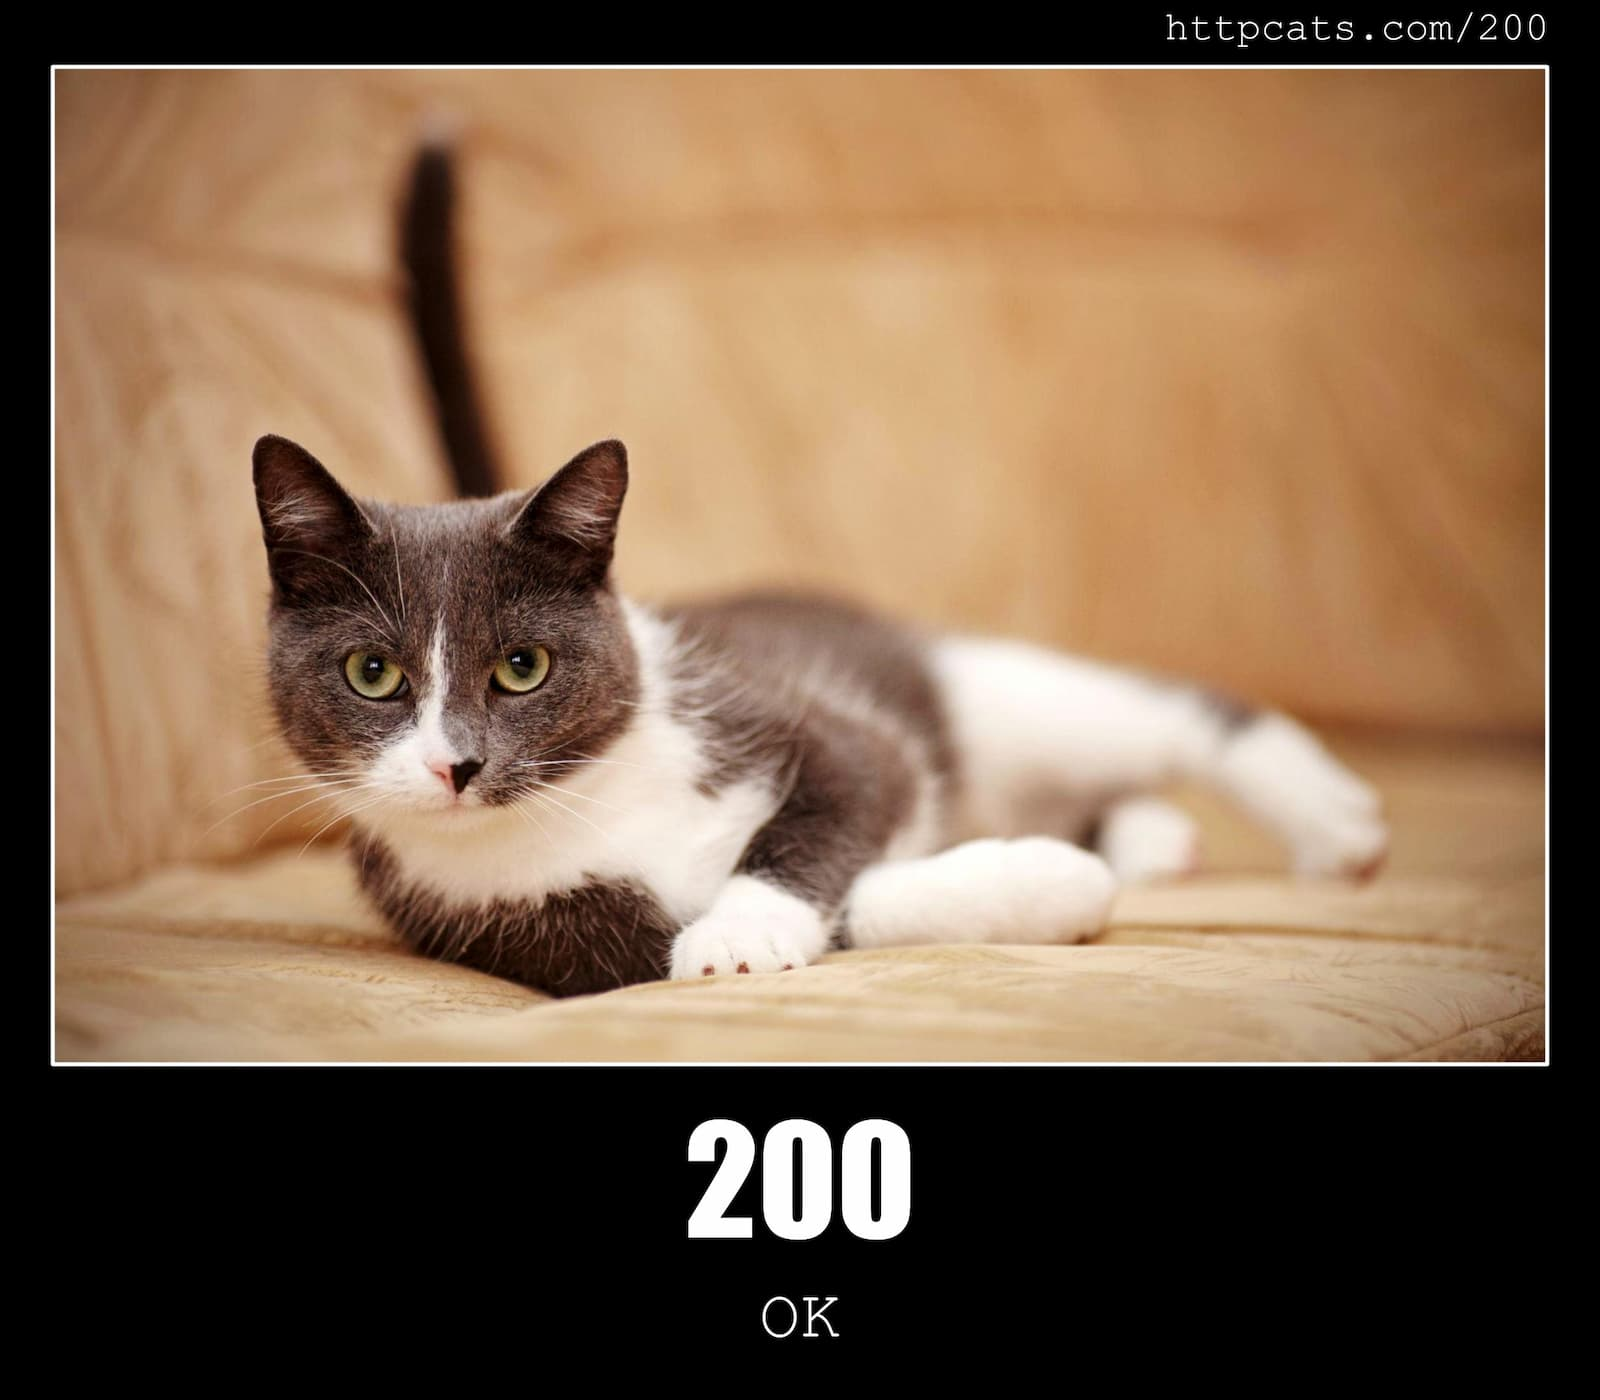

In [5]:
from IPython import display

headers         = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9"
}

response = requests.get(http_protocol + domain, headers=headers)

response.status_code

httpcats = 'https://httpcats.com/' + str(response.status_code) + '.jpg'
display.Image(httpcats)

## Sub-domains

### Search Engines

Google searching:

`site:<website>`

Remove results with a `-` operators:

`site:<website> -lens`

Bing:

`site:<website>`

## DNS Dumpster

Visit: https://dnsdumpster.com/

Download an excel file of results and rename this to `snapchat.com.xlsx`.
Place it in this directory for the following code to work.

In [6]:
# read csv in python

import pandas as pd

# df = pd.read_excel(file_name, usecols='A', skiprows=1)
# df = pd.read_excel(file_name, usecols='A')
# df = pd.read_excel(file_name, usecols='A:B')
df = pd.read_excel(file_name)

print(df) 

# mylist = df['Hostname'].tolist()
# # print(mylist)

# print(*mylist, sep = "\n")

# ip_list = df['IP Address'].tolist()
# print(*ip_list, sep = "\n")

                       Hostname      IP Address Type   
0                  snapchat.com   34.149.46.130    A  \
1           am-api.snapchat.com   216.239.38.21    A   
2       perception.snapchat.com   35.244.210.82    A   
3         o10.mail.snapchat.com     50.31.58.52    A   
4          support.snapchat.com   34.120.54.238    A   
..                          ...             ...  ...   
57       10 aspmx.l.google.com.   64.233.165.27   MX   
58  20 alt1.aspmx.l.google.com.  142.250.157.26   MX   
59  30 alt2.aspmx.l.google.com.  173.194.202.26   MX   
60    40 aspmx2.googlemail.com.  142.250.157.26   MX   
61    50 aspmx3.googlemail.com.  173.194.202.26   MX   

                               Reverse DNS         Netblock Owner   
0   130.46.149.34.bc.googleusercontent.com                 GOOGLE  \
1                    any-in-2615.1e100.net                 GOOGLE   
2   82.210.244.35.bc.googleusercontent.com                 GOOGLE   
3                    o10.mail.snapchat.com         

### Certificate Transparency

An SSL/TLS certificate usually contains domain names, sub-domain names and email addresses.

Some sources:
- https://crt.sh/
- https://censys.io/

### DNS Resolution

See if a host is resolvable on the internet (it might be public or private).

- https://viewdns.info/dnsreport/

Manual search:

`https://viewdns.info/dnsreport/?domain=snapchat.com`

With an API key:

https://viewdns.info/api/docs/dns-record-lookup.php


GET https://api.viewdns.info/dnsrecord/?domain=snapchat.com&YOURAPIKEY=yourapikey&output=json

In [11]:
output_type = 'json'

if viewdns_api_key is not None:
    viewdns_dnsrecord_domain = 'https://api.viewdns.info/dnsrecord/?domain=' + domain + 'recordtype=A&apikey=' + viewdns_api_key + '&output=' + output_type


    def get_response_from_view_dns(domain):
        try:
            response = requests.get(domain, headers=headers, timeout=5)
            return response
        except requests.ConnectionError as err:
            print("Error with ", domain, err)
        except requests.ReadTimeout as err:
            print("Error with ", domain, err)
        
        
    viewdns_response = get_response_from_view_dns(viewdns_dnsrecord_domain)
else:
    print("view_dnsrecord_domain is not defined")
# viewdns_response.text

view_dnsrecord_domain is not defined


## ASN Lookup

Use the ASN to perform further searches, such as on Shodan.

## Headers

_Explore with Miro_

- check if security headers are present
- check if custom headers are present
- get information from certain headers

Reference:
https://book.hacktricks.xyz/network-services-pentesting/pentesting-web/special-http-headers

In [8]:
response.headers


def get_list_keys(dict):
    list = []
    for key in dict.keys():
        list.append(key)
         
    return list

keys_list = get_list_keys(response.headers)
keys_list

['x-frame-options',
 'x-xss-protection',
 'content-security-policy',
 'strict-transport-security',
 'x-request-id',
 'set-cookie',
 'cache-control',
 'x-powered-by',
 'content-type',
 'vary',
 'content-encoding',
 'date',
 'x-envoy-upstream-service-time',
 'server',
 'via',
 'Alt-Svc',
 'Transfer-Encoding']

In [9]:
import re

if 'x-frame-options' in keys_list:
    print("exists")
else:
    print("false")

# headers I want to look for
search_terms = ['x-frame-options',
 'x-xss-protection',
 'content-security-policy',
 'strict-transport-security']
    
# for list in keys_list:
#     for term in search_terms:
#         if term in keys_list:
#             print(term + " exists")
#     print(list)

for term in search_terms:
    if term in keys_list:
        print(term + " exists")

exists
x-frame-options exists
x-xss-protection exists
content-security-policy exists
strict-transport-security exists


## Tech Stack

In [10]:
# this package is quite outdated and does not cover many technologies

import builtwith

builtwith.parse(https_protocol + domain)

{'javascript-frameworks': ['React']}

## Archive sites using gau

Tool setup: https://github.com/lc/gau

Example: 
output written to - gau_snapchat.txt
providers - only use wayback results

`gau --o gau_snapchat.txt --providers wayback 'snapchat.com'`

Can you find particular words or file extensions?

## Buckets